# Reto Clasificación flores
### Cargamos las librerías y las funciones a utilizar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, f1_score, recall_score, precision_score,
                             confusion_matrix, roc_curve, roc_auc_score, classification_report)
from sklearn.preprocessing import label_binarize


# Cargmos los datos del conjunto de datos Iris

In [2]:
data = load_iris()
X = data.data
y = data.target
class_names = data.target_names

# Dividir los datos en entrenamiento y prueba

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1000)

# Definir el modelo con kernel RBF

In [4]:
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)

# Definir los parámetros a buscar
param_grid_svm_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

# Realizar la búsqueda en malla para encontrar los mejores hiperparámetros
grid_search_svm_rbf = GridSearchCV(svm_rbf, param_grid_svm_rbf, cv=5, scoring='accuracy')
grid_search_svm_rbf.fit(X_train, y_train)

# Mejor modelo y resultados
best_svm_rbf = grid_search_svm_rbf.best_estimator_
y_pred_svm_rbf = best_svm_rbf.predict(X_test)

# Calcular la matriz de confusión para SVM RBF

In [5]:
cm_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)

# Mostrar la matriz de confusión con Seaborn para SVM RBF

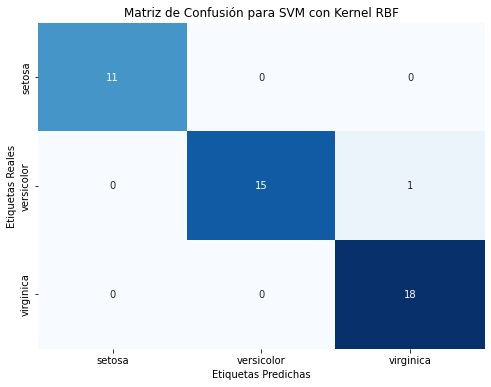

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_rbf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión para SVM con Kernel RBF')
plt.show()

# Evaluar SVM con Kernel RBF

In [7]:
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
f1_svm_rbf = f1_score(y_test, y_pred_svm_rbf, average='macro')
recall_svm_rbf = recall_score(y_test, y_pred_svm_rbf, average='macro')
precision_svm_rbf = precision_score(y_test, y_pred_svm_rbf, average='macro')

# Imprimir las métricas para SVM con Kernel RBF

In [8]:
print(f"\nMétricas para SVM con Kernel RBF:")
print(f"Exactitud (Accuracy): {accuracy_svm_rbf:.2f}")
print(f"F1-Score: {f1_svm_rbf:.2f}")
print(f"Recall (Sensibilidad): {recall_svm_rbf:.2f}")
print(f"Precisión: {precision_svm_rbf:.2f}")


Métricas para SVM con Kernel RBF:
Exactitud (Accuracy): 0.98
F1-Score: 0.98
Recall (Sensibilidad): 0.98
Precisión: 0.98


# Binarizar las etiquetas para la curva ROC

In [9]:
y_true_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_svm_rbf_proba = best_svm_rbf.predict_proba(X_test)

# Curva ROC y AUC para SVM con Kernel RBF

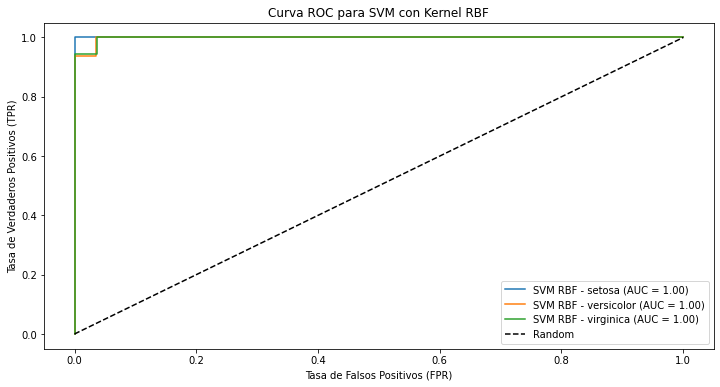

In [10]:
plt.figure(figsize=(12, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_pred_svm_rbf_proba[:, i])
    auc = roc_auc_score(y_true_binarized[:, i], y_pred_svm_rbf_proba[:, i])
    plt.plot(fpr, tpr, label=f'SVM RBF - {class_names[i]} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para SVM con Kernel RBF')
plt.legend(loc='best')
plt.show()

# Crear y ajustar el modelo de Gradient Boosting

In [11]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Validación cruzada K-Fold

In [12]:
kf = 5
scores_gb = cross_val_score(gb, X, y, cv=kf, scoring='accuracy')

# Ajustar el modelo con los datos de entrenamiento

In [13]:
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Calcular la matriz de confusión para Gradient Boosting

In [14]:
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Mostrar la matriz de confusión con Seaborn para Gradient Boosting

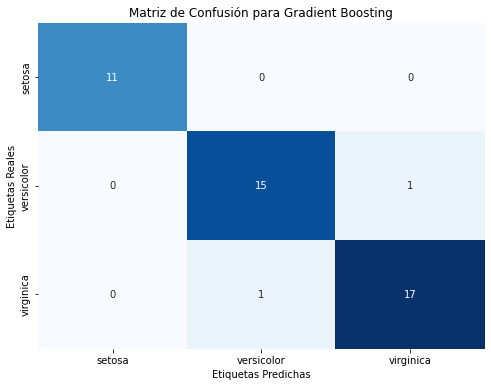

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión para Gradient Boosting')
plt.show()

# Resultados de validación cruzada

In [16]:
print(f"\nExactitud promedio del Gradient Boosting (K-Fold): {np.mean(scores_gb):.4f}")


Exactitud promedio del Gradient Boosting (K-Fold): 0.9600


# Evaluar Gradient Boosting

In [17]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb, average='macro')
recall_gb = recall_score(y_test, y_pred_gb, average='macro')
precision_gb = precision_score(y_test, y_pred_gb, average='macro')

# Imprimir las métricas para Gradient Boosting

In [18]:
print(f"\nMétricas para Gradient Boosting:")
print(f"Exactitud (Accuracy): {accuracy_gb:.2f}")
print(f"F1-Score: {f1_gb:.2f}")
print(f"Recall (Sensibilidad): {recall_gb:.2f}")
print(f"Precisión: {precision_gb:.2f}")


Métricas para Gradient Boosting:
Exactitud (Accuracy): 0.96
F1-Score: 0.96
Recall (Sensibilidad): 0.96
Precisión: 0.96


# Binarizar las etiquetas para la curva ROC

In [19]:
y_pred_gb_proba = gb.predict_proba(X_test)
print(y_pred_gb_proba)

[[8.72893561e-06 9.99976216e-01 1.50546355e-05]
 [9.99994748e-01 4.09271138e-06 1.15975800e-06]
 [6.92114871e-07 1.15826837e-04 9.99883481e-01]
 [7.95423144e-07 8.11140338e-07 9.99998393e-01]
 [9.99994748e-01 4.09271138e-06 1.15975800e-06]
 [9.99992398e-01 6.44202336e-06 1.15975038e-06]
 [1.33544635e-05 9.99963613e-01 2.30321987e-05]
 [9.65978534e-06 9.99973716e-01 1.66246447e-05]
 [9.99994748e-01 4.09271138e-06 1.15975800e-06]
 [7.31298364e-07 9.19217836e-06 9.99990077e-01]
 [7.95423144e-07 8.11140338e-07 9.99998393e-01]
 [6.66052903e-06 9.99981877e-01 1.14628767e-05]
 [9.99992398e-01 6.44202336e-06 1.15975038e-06]
 [9.99992398e-01 6.44202336e-06 1.15975038e-06]
 [7.95423144e-07 8.11140338e-07 9.99998393e-01]
 [7.45301859e-06 9.99979693e-01 1.28540847e-05]
 [9.62016461e-06 9.99956947e-01 3.34323923e-05]
 [7.45301859e-06 9.99979693e-01 1.28540847e-05]
 [9.99994748e-01 4.09271138e-06 1.15975800e-06]
 [9.99992398e-01 6.44202336e-06 1.15975038e-06]
 [6.37041726e-06 9.99982643e-01 1.098694

# Curva ROC y AUC para Gradient Boosting

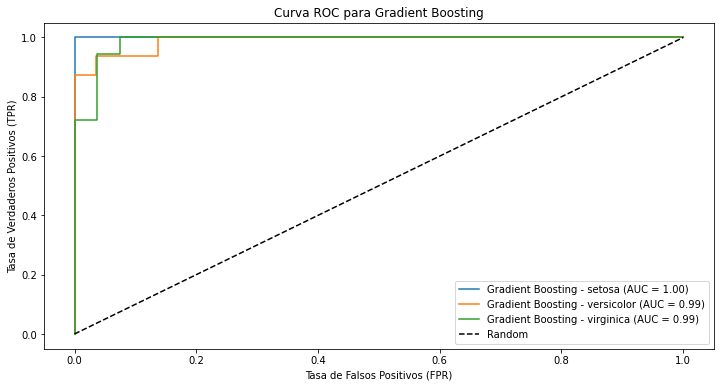

In [20]:
plt.figure(figsize=(12, 6))

for i in range(3):
    fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_pred_gb_proba[:, i])
    auc = roc_auc_score(y_true_binarized[:, i], y_pred_gb_proba[:, i])
    plt.plot(fpr, tpr, label=f'Gradient Boosting - {class_names[i]} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para Gradient Boosting')
plt.legend(loc='best')
plt.show()

## Separación de Datos: Función `train_test_split()`

Para esta práctica se utiliza la función `train_test_split` de la librería `sklearn.model_selection`. Esta función se encarga de dividir el conjunto de datos en dos partes: entrenamiento (**train**) y prueba (**test**). Aunque en este caso se ha utilizado para una partición de 70% entrenamiento y 30% prueba, puede ser adaptada para incluir también un conjunto de validación.

#### Ventajas de `train_test_split`:

1. **Facilita la evaluación del modelo**: Al separar los datos en diferentes conjuntos, podemos entrenar el modelo en el conjunto de entrenamiento y evaluarlo en el conjunto de prueba para medir su rendimiento.
2. **Generalización**: Ayuda a evaluar la capacidad de generalización del modelo en datos no vistos (el conjunto de prueba).
3. **Flexible**: Podemos ajustar el porcentaje de datos que queremos utilizar para entrenamiento, prueba e incluso validación.

### Uso en esta práctica

En esta práctica, hemos dividido los datos del conjunto **Iris** en 70% para entrenamiento y 30% para prueba. Esta división es aplicable para la evaluación de los modelos **SVM con Kernel RBF** y **Gradient Boosting**.

**Código:**

```python
from sklearn.model_selection import train_test_split

# División de los datos en entrenamiento y prueba (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1000)

# Explicación de Métricas de Evaluación de Modelos

Este documento explica las métricas de evaluación utilizadas en dos modelos de clasificación aplicados al conjunto de datos **Iris**. Los modelos evaluados son **SVM con Kernel RBF** y **Gradient Boosting**. A continuación, se describen las métricas: precisión, recall (sensibilidad), F1-score, exactitud (accuracy), especificidad, y AUC-ROC, con su respectiva explicación matemática y cómo se implementan en el código.

---

## 1. Precisión (Precision)

La **precisión** mide la proporción de verdaderos positivos (TP) sobre el total de instancias clasificadas como positivas (TP + FP). Es útil cuando el costo de los falsos positivos es alto.

**Fórmula:**

$$
Precision = \frac{TP}{TP + FP}
$$

**En el código:** Se utiliza la función `precision_score()` de `sklearn.metrics` para calcular la precisión de ambos modelos.

---

## 2. Recall (Sensibilidad)

El **recall** o **sensibilidad** mide la proporción de verdaderos positivos (TP) sobre el total de instancias que son realmente positivas (TP + FN). Es útil cuando el costo de los falsos negativos es alto.

**Fórmula:**

$$
Recall = \frac{TP}{TP + FN}
$$

**En el código:** Se utiliza la función `recall_score()` de `sklearn.metrics` para calcular el recall de ambos modelos.

---

## 3. F1-Score

El **F1-score** es la media armónica entre precisión y recall. Se utiliza cuando se quiere un balance entre estas dos métricas, especialmente en casos de datos desbalanceados.

**Fórmula:**

$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$

**En el código:** Se calcula con la función `f1_score()` de `sklearn.metrics` para ambos modelos.

---

## 4. Exactitud (Accuracy)

La **exactitud** mide la proporción de predicciones correctas (verdaderos positivos y verdaderos negativos) sobre el total de predicciones.

**Fórmula:**

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

**En el código:** Se implementa utilizando la función `accuracy_score()` de `sklearn.metrics` para evaluar la exactitud de ambos modelos.

---

## 5. Especificidad

La **especificidad** mide la proporción de verdaderos negativos (TN) sobre el total de instancias que son realmente negativas (TN + FP). Es útil para evaluar cómo el modelo evita clasificar incorrectamente instancias negativas como positivas.

**Fórmula:**

$$
Specificity = \frac{TN}{TN + FP}
$$

**En el código:** Se implementa manualmente con la función `calcular_especificidad()`, que utiliza la matriz de confusión (`confusion_matrix()`) para ambos modelos.

---

## 6. Curva ROC y AUC

La **curva ROC** muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a diferentes umbrales de clasificación.

El **AUC** (Área Bajo la Curva) mide el área bajo la curva ROC. Un AUC cercano a 1 indica un buen desempeño del modelo para distinguir entre clases.

**En el código:** Se utiliza `roc_curve()` y `roc_auc_score()` para calcular y graficar la curva ROC para cada clase de ambos modelos.

---

## 7. Matriz de Confusión

La **matriz de confusión** muestra el número de verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN) para cada clase, permitiendo visualizar los errores de clasificación.

**En el código:** La matriz de confusión se grafica utilizando `confusion_matrix()` y la función `graficar_matriz_confusion()`, que genera un heatmap de la matriz para ambos modelos.

---

## Resumen de las Funciones Utilizadas:

- **`precision_score()`**: Calcula la precisión (macro promedio).
- **`recall_score()`**: Calcula el recall o sensibilidad (macro promedio).
- **`f1_score()`**: Calcula el F1-score (macro promedio).
- **`accuracy_score()`**: Calcula la exactitud de las predicciones.
- **`calcular_especificidad()`**: Calcula la especificidad para cada clase y retorna el promedio.
- **`roc_curve()`** y **`roc_auc_score()`**: Calculan la curva ROC y el área bajo la curva.
- **`confusion_matrix()`**: Genera la matriz de confusión.
- **`graficar_matriz_confusion()`**: Grafica la matriz de confusión usando Seaborn.

## Modelos Evaluados:

Los modelos evaluados incluyen:

1. **SVM con Kernel RBF**
2. **Gradient Boosting**

Cada modelo es entrenado con el conjunto de datos Iris y evaluado usando las métricas mencionadas. Las matrices de confusión y las curvas ROC de cada modelo se grafican para una mejor visualización del rendimiento.

---


# Análisis de Modelos: SVM con Kernel RBF vs. Gradient Boosting

En esta sección, se presenta una comparación entre dos modelos de clasificación: **SVM con Kernel RBF** y **Gradient Boosting**. Los modelos se evaluaron utilizando las siguientes métricas: **Precisión**, **Recall (Sensibilidad)**, **F1-score** y **Exactitud (Accuracy)**.

## Resultados de los Modelos

### 1. SVM con Kernel RBF

- **Precisión:** 0.98
- **Recall (Sensibilidad):** 0.98
- **F1-score:** 0.98
- **Exactitud (Accuracy):** 0.98

### 2. Gradient Boosting

- **Precisión:** 0.96
- **Recall (Sensibilidad):** 0.96
- **F1-score:** 0.96
- **Exactitud (Accuracy):** 0.96

## Comparación de Resultados

### Precisión
- **SVM con Kernel RBF:** 0.98
- **Gradient Boosting:** 0.96

**SVM con Kernel RBF** tiene una precisión ligeramente superior, indicando que produce menos falsos positivos en comparación con **Gradient Boosting**.

### Recall (Sensibilidad)
- **SVM con Kernel RBF:** 0.98
- **Gradient Boosting:** 0.96

**SVM con Kernel RBF** también muestra un mejor recall, identificando un mayor porcentaje de casos positivos en comparación con **Gradient Boosting**.

### F1-score
- **SVM con Kernel RBF:** 0.98
- **Gradient Boosting:** 0.96

El **F1-score** de **SVM con Kernel RBF** es superior, lo que refleja un mejor equilibrio entre precisión y recall en comparación con **Gradient Boosting**.

### Exactitud (Accuracy)
- **SVM con Kernel RBF:** 0.98
- **Gradient Boosting:** 0.96

**SVM con Kernel RBF** presenta una mayor exactitud, lo que significa que ha clasificado correctamente una mayor proporción de instancias en comparación con **Gradient Boosting**.

## Conclusión

**SVM con Kernel RBF** muestra un rendimiento superior en todas las métricas evaluadas en comparación con **Gradient Boosting**. Aunque ambos modelos ofrecen un alto nivel de precisión, recall, F1-score y exactitud, **SVM con Kernel RBF** destaca por su ligera ventaja en cada una de estas métricas. La elección entre los modelos puede depender de factores adicionales como la complejidad del modelo, el tiempo de entrenamiento, y los recursos computacionales disponibles, pero en términos de rendimiento, **SVM con Kernel RBF** se presenta como la opción más robusta en este análisis.